# Medical_Expending_Data_Visualisation

In [2]:
## Importing important libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=30)
matplotlib.rcParams.update({'font.size': 28})
import math
import datetime as dt
import os
import sys

## Utility Functions

In [3]:

## Visulalization function 
def Visualize(dataset,List_of_count_to_print,title1,ylab,vx=50,vy=30,w=.80):
    df = dataset
    n = 0
    for i in List_of_count_to_print:
        filter1 = df['Country'] == i
        df = df[filter1]
        labels = df['Date']
        conf = df['Confirmed']
        Recov = df['Recovered']
        Death = df['Deaths']
        
        #high = max(conf)
        #low = min(conf)
        
        x = np.arange(len(labels))  # the x label locations 
        width = w  # the width of the bars
        fig, ax = plt.subplots(figsize=(vx,vy))
        rects1 = ax.bar(x - width, conf, width, label='confirmed')
        rects2 = ax.bar(x , Recov, width, label='Recovered')
        rects3 = ax.bar(x + width , Death, width, label='Death')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel(ylab)
        ax.set_title(title1)
        ax.set_xticks(x)
        plt.xticks(rotation=90) 
        #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
        ax.set_xticklabels(labels)
        ax.legend()
        n  = n + 1
    
    
    plt.show()
    
## function to Check the List of Countries avaialable
def count_avalaible(dataframe,country_coul_rep = 'Country'):
    x = 0
    for i in set(dataframe.loc[:,country_coul_rep]):
        print(i,end=' | ')
        x = x + 1
        if(x > 6):
            x = 0
            print()
    print("\n\n##Total No of Countries = " + str(len(set(dataframe.loc[:,country_coul_rep]))))
    
    

## Loading Medical_Expending_Data Data

In [4]:
Medical_Expending_Countires_Wise = pd.read_csv('../../Medical Expending/API_SH.XPD.CHEX.PC.CD_DS2_en_csv_v2_1218407/API_SH.XPD.CHEX.PC.CD_DS2_en_csv_v2_1218407.csv')
Medical_Expending_Countires_Wise

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,51.553257,52.218510,55.967548,60.112759,60.088814,61.451286,67.122650,NaN,NaN,NaN
2,Angola,AGO,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,122.117798,122.242943,143.703217,131.751877,108.680672,95.220802,114.459641,NaN,NaN,NaN
3,Albania,ALB,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4013.911865,3857.161133,4107.733887,4346.258301,3695.067871,3843.702881,4040.786621,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,64.361031,73.826073,78.390152,79.746155,72.039467,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,597.359436,579.748535,526.499573,509.833221,470.796967,428.296875,499.237549,NaN,NaN,NaN
262,Zambia,ZMB,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,56.911751,68.191803,86.819550,66.555664,58.517654,56.544182,67.648666,NaN,NaN,NaN


In [5]:
## Check the List of Countries avaialable

## Columns renaming for Uniformity
Medical_Expending_Countires_Wise = Medical_Expending_Countires_Wise.rename(columns={'Country Name': 'Country'})
count_avalaible(Medical_Expending_Countires_Wise,'Country')

Venezuela, RB | Guyana | Papua New Guinea | Mauritius | Small states | Japan | South Sudan | 
Mexico | France | Ecuador | Serbia | Latin America & Caribbean | Croatia | Kiribati | 
Belize | Marshall Islands | Macao SAR, China | Cyprus | Mali | Mongolia | Guinea | 
Guam | Arab World | Guinea-Bissau | Congo, Dem. Rep. | Europe & Central Asia | Gambia, The | Kyrgyz Republic | 
Eritrea | Korea, Rep. | Colombia | Luxembourg | Post-demographic dividend | Zimbabwe | Northern Mariana Islands | 
Uruguay | Greenland | Timor-Leste | Lesotho | Sudan | Azerbaijan | Nicaragua | 
Solomon Islands | Suriname | Vietnam | Hungary | Poland | Andorra | United Kingdom | 
North America | Caribbean small states | Montenegro | French Polynesia | Middle East & North Africa (IDA & IBRD countries) | Kenya | Ethiopia | 
Tajikistan | Latin America & the Caribbean (IDA & IBRD countries) | Bahrain | Seychelles | European Union | Sierra Leone | Liberia | 
Tanzania | Fiji | Spain | Latvia | Kuwait | East Asia & Pacific

In [6]:
## Analysing the data Structure

Country_to_look_for = 'India'
ylab = "Expeniding in $"
xlab = "Countries"

filter1 = Medical_Expending_Countires_Wise['Country'] == Country_to_look_for
Medical_Expending_Countires_Wise_country_specific = Medical_Expending_Countires_Wise[filter1]
Medical_Expending_Countires_Wise_country_specific                 
#Medical_Expending_Countires_Wise  ## Uncomment this to view for all countires at once

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
107,India,IND,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,48.722836,49.051403,56.218464,57.151138,58.966335,60.618382,69.293098,NaN,NaN,NaN


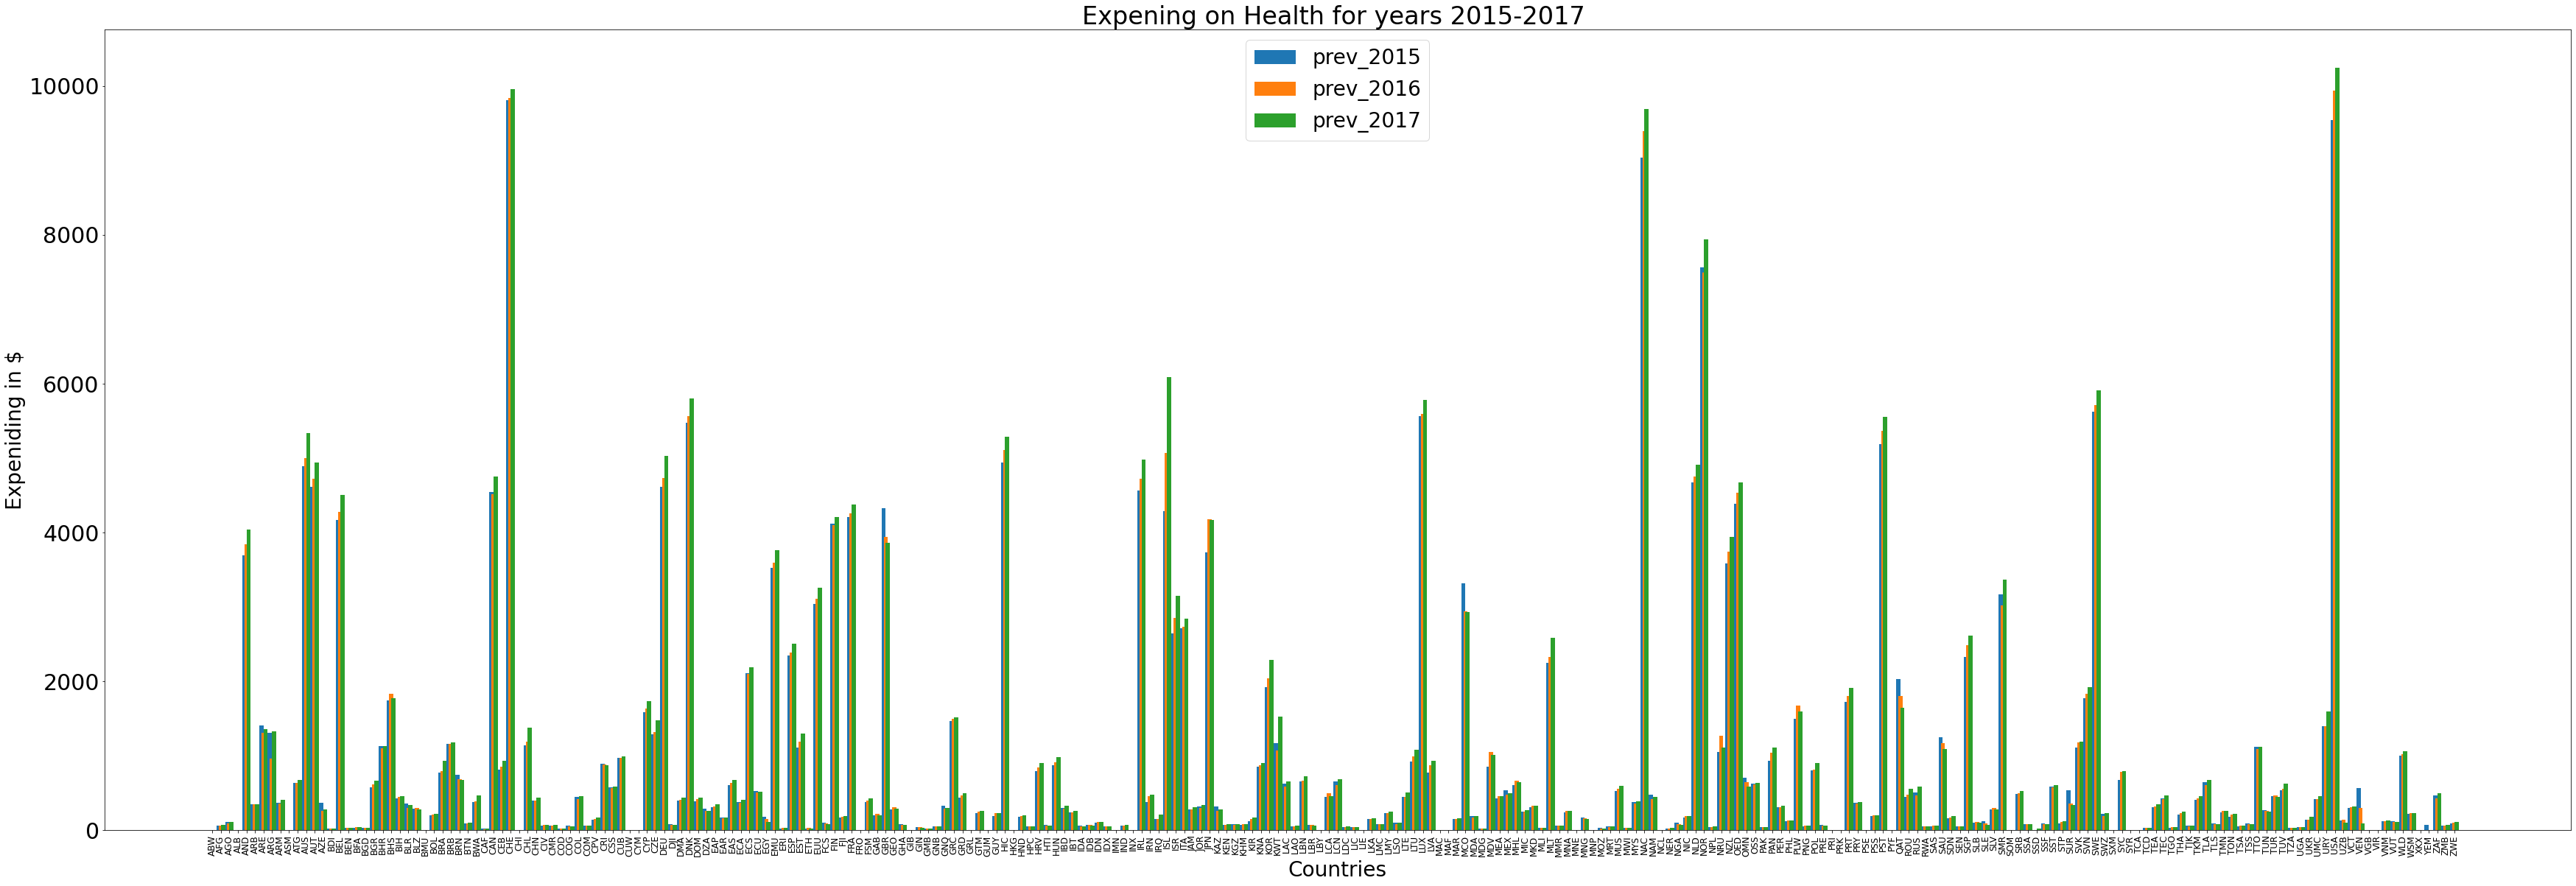

In [7]:
## Visualisation
df = Medical_Expending_Countires_Wise
            

labels = df['Country Code']
prev_2015 = df['2015']
prev_2016 = df['2016']
prev_2017 = df['2017']
        
title1 = 'Expening on Health for years 2015-2017 '
#high = int(max(prev_2018))
#low = 0  

x = np.arange(len(labels))  # the x label locations 
width = .50  # the width of the bars
fig, ax = plt.subplots(figsize=(60,20))
rects1 = ax.bar(x-width/2, prev_2015, width, label='prev_2015')
rects2 = ax.bar(x, prev_2016, width, label='prev_2016')
rects3 = ax.bar(x+width/2, prev_2017, width, label='prev_2017')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(ylab)
ax.set_xlabel(xlab)
ax.set_title(title1)
ax.set_xticks(x)
#ax.set_yticks(y)
plt.xticks(rotation=90) 
#plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
ax.set_xticklabels(labels)
ax.legend()

plt.show()    
    

## Cleaning Mdeical Expending DATA(Preprocessing)

In [8]:
Medical_Expending_Countires_Wise = Medical_Expending_Countires_Wise.fillna(0)
Medical_Expending_Countires_Wise_imp_features_only = Medical_Expending_Countires_Wise.drop(Medical_Expending_Countires_Wise.columns.difference(['Country','2015','2016','2017']), 1)
Medical_Expending_Countires_Wise_imp_features_only = Medical_Expending_Countires_Wise_imp_features_only.replace('United States', 'US')

In [9]:
Medical_Expending_Countires_Wise_imp_features_only

,Country,2015,2016,2017
0,Aruba,0.000000,0.000000,0.000000
1,Afghanistan,60.088814,61.451286,67.122650
2,Angola,108.680672,95.220802,114.459641
3,Albania,0.000000,0.000000,0.000000
4,Andorra,3695.067871,3843.702881,4040.786621
...,...,...,...,...
259,Kosovo,0.000000,0.000000,0.000000
260,"Yemen, Rep.",72.039467,0.000000,0.000000
261,South Africa,470.796967,428.296875,499.237549
262,Zambia,58.517654,56.544182,67.648666


In [11]:
## Column match

print('-----------------------------------------------------------------')

countries = ['Afghanistan','Italy' , 'Kuwait', 'India', 'South Africa' ,'US','Bangladesh', 'Brazil','Egypt',
             'United Kingdom','Sri Lanka', 'Chile' , 'Norway', 'New Zealand' ,'Switzerland','Ireland','Argentina',
'Australia', 'Canada', 'China','Slovenia','North Macedonia','Zimbabwe','Sweden','Netherlands','Pakistan']
k = 0

match = []
for i in set(Medical_Expending_Countires_Wise_imp_features_only.loc[:,'Country']):
    if(i in countries):
        k +=1
        match.append(i)
        print(i)
        
print(k)
print("-------Not Matching --------------------")
for i in countries:
    if(i not in match ):
        print(i)

-----------------------------------------------------------------
Zimbabwe
United Kingdom
Kuwait
US
North Macedonia
Argentina
Brazil
Australia
India
Ireland
Switzerland
Bangladesh
Netherlands
Chile
Sweden
Canada
Norway
South Africa
Sri Lanka
Pakistan
New Zealand
China
Slovenia
Afghanistan
Italy
25
-------Not Matching --------------------
Egypt


##  Writing the cleaned data in Cleaned Folder

In [10]:
Medical_Expending_Countires_Wise_imp_features_only.to_csv('../Pre_Processed_Data/Medical_Expending_Countires_Wise_Processed.csv')

## Visualisation After Cleaning 

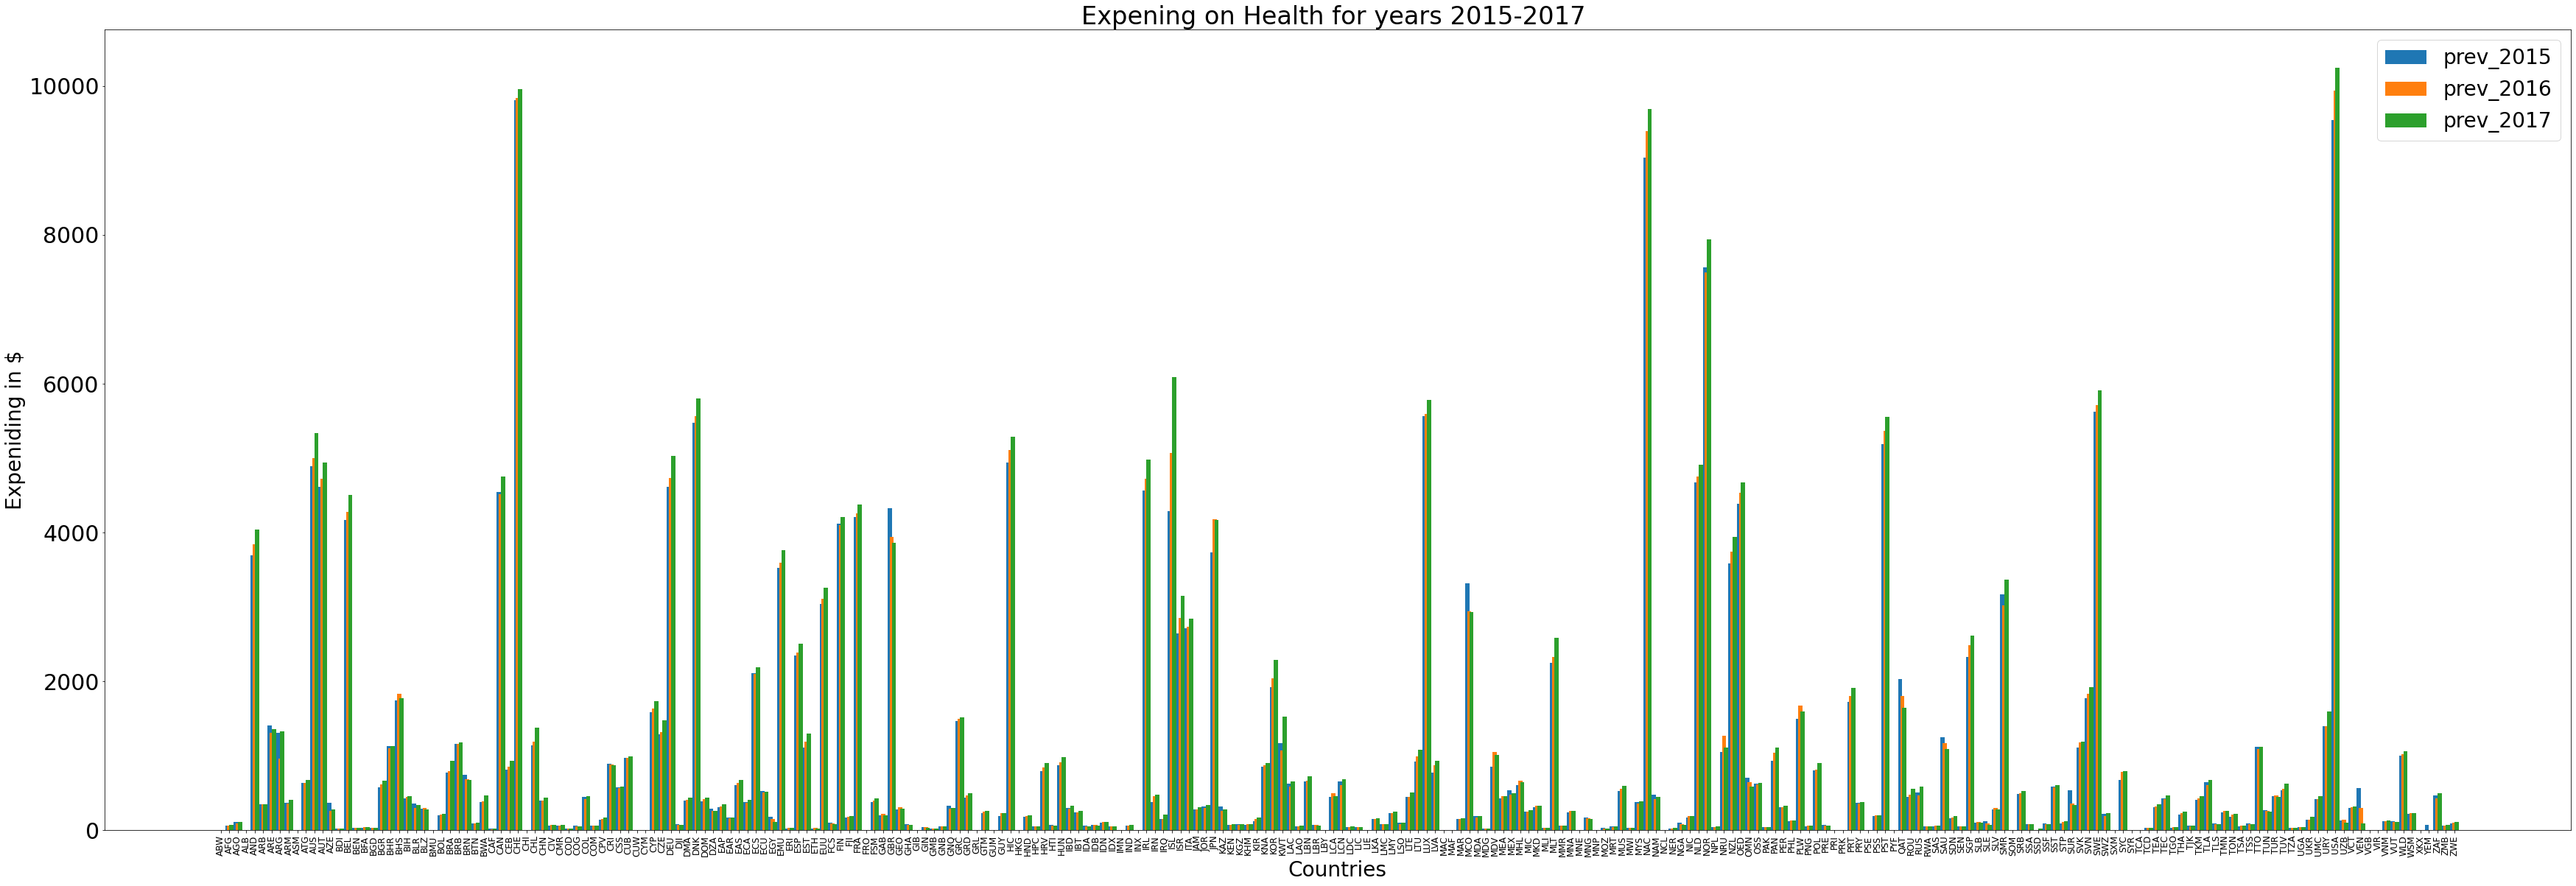

In [11]:
## Visualisation
df = Medical_Expending_Countires_Wise
            

labels = df['Country Code']
prev_2015 = df['2015']
prev_2016 = df['2016']
prev_2017 = df['2017']
        
title1 = 'Expening on Health for years 2015-2017 '
#high = int(max(prev_2018))
#low = 0  

x = np.arange(len(labels))  # the x label locations 
width = .50  # the width of the bars
fig, ax = plt.subplots(figsize=(60,20))
rects1 = ax.bar(x-width/2, prev_2015, width, label='prev_2015')
rects2 = ax.bar(x, prev_2016, width, label='prev_2016')
rects3 = ax.bar(x+width/2, prev_2017, width, label='prev_2017')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(ylab)
ax.set_xlabel(xlab)
ax.set_title(title1)
ax.set_xticks(x)
#ax.set_yticks(y)
plt.xticks(rotation=90) 
#plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
ax.set_xticklabels(labels)
ax.legend()

plt.show()    
    